(supervised:logistic-regression)=
# Logistic Regression

Logistic regression is a standard classification technique for binary and multiclass problems. It predicts class probabilities via nonlinear regression. Probabilities are modeled as sigmoid of a linear function of the feature values (or softmax of linear functions for multiclass). The model is fit to data by minimizing the log loss. Logistic regression almost always requires regularization, which is easily incorporated by adding some penalty (cf. linear regression) to the loss. Minimization is done numerically, e.g. with gradient descent.

## Binary Logistic Regression

### The Method

Given a binary classification task with classes 0 and 1 we model the probability that a sample $x\in\mathbb{R}^m$ belongs to class 1 as
\begin{equation*}
\frac{1}{1+\mathrm{e}^{-\left(a_0+a_1\,x^{(1)}+\cdots+a_m\,x^{(m)}\right)}}
\end{equation*}
with real parameters $a_0,a_1,\ldots,a_m$.
This is the sigmoid function applied to score which is a linear function of the inputs. With
\begin{equation*}
\mathring{x}:=\left(1,x^{(1)},\ldots,x^{(m)}\right)\qquad\text{and}\qquad\mathring{a}:=\left(a_0,a_1,\ldots,a_m\right)
\end{equation*}
it reads
\begin{equation*}
\frac{1}{1+\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}}}.
\end{equation*}
For training samples $(x_1,y_1),\ldots,(x_n,y_n)$ corresponding log loss is
\begin{align*}
\text{log loss}
&=-\frac{1}{n}\,\sum_{l=1}^n\left(y_l\,\log\frac{1}{1+\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}_l}}+(1-y_l)\,\log\left(1-\frac{1}{1+\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}_l}}\right)\right)\\
&=\frac{1}{n}\,\sum_{l=1}^n\left(y_l\,\log\left(1+\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}_l}\right)-(1-y_l)\,\left(-\mathring{a}^\mathrm{T}\,\mathring{x}_l-\log\left(1+\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}_l}\right)\right)\right)\\
&=\frac{1}{n}\,\sum_{l=1}^n\left((1-y_l)\,\mathring{a}^\mathrm{T}\,\mathring{x}_l+\log\left(1+\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}_l}\right)\right).
\end{align*}

Minimizing the loss function with respect to $\mathring{a}$ yields the model
\begin{equation*}
\frac{1}{1+\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}}}.
\end{equation*}
for predicting the probability that some sample $x$ belongs to class 1. From that probability we may derive a class table by thresholding.

### Interpretation

Thresholding predicted probabilities at some level $t\in(0,1)$ yields class 1 if and only if
\begin{equation*}
\frac{1}{1+\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}}}\geq t
\quad\Leftrightarrow\quad\frac{1-t}{t}\geq\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}}
\quad\Leftrightarrow\quad\log\frac{t}{1-t}\leq\mathring{a}^\mathrm{T}\,\mathring{x}.
\end{equation*}
The equation
\begin{equation*}
\log\frac{t}{1-t}=\mathring{a}^\mathrm{T}\,\mathring{x}
\quad\Leftrightarrow\quad a_1\,x^{(1)}+\cdots+a_m\,x^{(m)}=\log\frac{t}{1-t}-a_0
\end{equation*}
defines a hyperplane in $\mathbb{R}^m$ (the set of points $x$ satisfying the equation is a hyperplane).
Thus, logistic regression (plus thresholding) splits the feature space into two half spaces and assigns samples in one half space the label 0 and samples in the other half space the label 1. Logistic regression determines the direction of the splitting hyperplane, the threshold controls parallel displacement.

From this observation it is obvious that logistic regression only yields good predictions if classes are (almost) linearly separable.

### Why not Fitting Scores Directly?

Logistic regression uses linear scoring, but fits sigmoids of the scores to the data. Sigmoids convert the linear ansatz to a nonlinear one. Why not transforming data and then fit a linear model to the transformed data? If $p$ is the predicted probability for $x$ belonging to class 0 we have
\begin{equation*}
p=\frac{1}{1+\mathrm{e}^{-\mathring{a}^\mathrm{T}\,\mathring{x}}}
\quad\Leftrightarrow\quad\log\frac{p}{1-p}=a_0+a_1\,x^{(1)}+\cdots+a_m\,x^{(m)}.
\end{equation*}
Thus, if we apply the function $g$ defined by
\begin{equation*}
g(v):=\log\frac{v}{1-v}
\end{equation*}
to the labels we have linear regression with linear functions. The problem is that class labels are either 0 or 1, but the domain of $g$ is $(0,1)$. We only have
\begin{equation*}
\lim_{v\to 0}g(v)=-\infty\qquad\text{and}\qquad\lim_{v\to 1}g(v)=\infty,
\end{equation*}
so we would have to transform labels 0 and 1 to $\pm\infty$, which cannot be handled in a linear regression setting.

## Multiclass Logistic Regression

For multiclass tasks we may use one of the following two standard (that is, not restricted to logistic regression) approaches to reduce the problem to several binary tasks.

### One-versus-Rest Approach

Given a multiclass classification problem with $C>2$ classes we consider $C$ binary classification problems, one per class. In each binary problem we decide whether an input belongs to the corresponding class or not. This yields $c$ scores for the multiclass classification problem.

The one-versus-rest approach requires training $C$ binary classification models on the full data set, which is only feasible if sufficient computational resources are available. One-versus-rest is mainly used in combination with logistic regression.

### One-versus-One Approach

Given a multiclass classification problem with $C>2$ classes we consider binary classification problems for all combinations of classes. With $C$ classes there are $\frac{C\,(C-1)}{2}$ class pairs. Each binary model is trained on the subset of the training set containing samples with targets in one of the two classes. Given an input we obtain a number of hits for each class. The class with most hits, that is, the class chosen in most of the binary problems, is chosen as output of the multiclass task.

With the one-versus-one approach we have to train more models than for the one-versus-rest approach and training data sets are smaller. One-versus-one is typically used in combination with models not very sensitive to training set size. An example are so called support vector machines (SVM) considered later on.

### Alternative to Standard Approaches

An alternative to one-versus-rest and one-versus-one specific to logistic regression is to replace the sigmoid by softmax for transforming lineare scores. Then logistic regression minimizes the log loss of softmax of linear score models. Because probabilities sum to 1 we only have to predict $C-1$ probabilities in a $C$ classes setting. For instance we could set the score of class $C$ to 0. Then the model for the $C$ probabilities is
\begin{equation*}
\frac{\mathrm{e}^{\mathring{a}_1^\mathrm{T}\,\mathring{x}}}{\mathrm{e}^{\mathring{a}_1^\mathrm{T}\,\mathring{x}}+\cdots+\mathrm{e}^{\mathring{a}_{C-1}^\mathrm{T}\,\mathring{x}}+1},\quad\ldots,\quad\frac{\mathrm{e}^{\mathring{a}_{C-1}^\mathrm{T}\,\mathring{x}}}{\mathrm{e}^{\mathring{a}_1^\mathrm{T}\,\mathring{x}}+\cdots+\mathrm{e}^{\mathring{a}_{C-1}^\mathrm{T}\,\mathring{x}}+1},\quad\frac{1}{\mathrm{e}^{\mathring{a}_1^\mathrm{T}\,\mathring{x}}+\cdots+\mathrm{e}^{\mathring{a}_{C-1}^\mathrm{T}\,\mathring{x}}+1}
\end{equation*}
with $(C-1)\,(m+1)$ parameters $a_i^l$, $i=1,\ldots,C-1$, $l=0,1,\ldots,m$.

## Logistic Regression with Scikit-Learn

Scikit-Learn implements three classes for logistic regression in the `linear_model` module:
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implements logistic regression with regularization. Strength of regularization can be controlled via the parameter $C$, which is the inverse of the usual regularization parameter $\alpha$. The higher $C$ the less regularization is applied. Different algorithms for solving the minimization problem can be chosen.
* [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) implements stochastic gradient descent (very efficient in case of many samples) for several loss functions. Passing `loss='log'` yields regularized logistic regression. Regulatization is controlled by parameter `alpha`.
* [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) combines `LogisticRegression` with cross validation for choosing the regularization parameter.

All three classes support different penalties (squares/l2, LASSO/l1, elastic net).

## The Need for Regularization

Logistic regression almost always is run with regularization. There are two reasons for regularizing logistic regression:
* avoid overfitting,
* guarantee existence of a solution.

Although logistic regression uses linear models with relatively few parameters overfitting may occur. An example will be given below.

A more serious problem is that for linearly separable classes (that is, perfect classification is possible with logistic regression), the unregularized objective function of logistic regression has no minimizer. We may drive its value arbitrarily close to zero, but we cannot reach zero. Model parameters will grow to infinity und numerical minimization procedures never satisfy a stopping criterion. Regularization guarantees existence of a minimizer und, thus, numerical stability. Linearly separable classes frequently occur for problems with few training data but many features.

To demonstrate the influence of regularization we consider binary classification with two classes 0 (red) and 1 (green) and two features. We use synthetic data with well separated classes and one outlier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import sklearn.linear_model as linear_model

rng = np.random.default_rng(0)

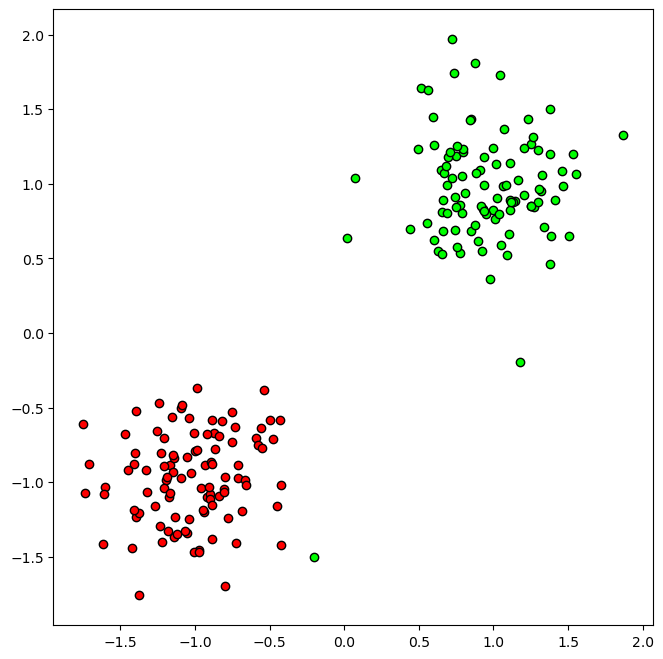

In [2]:
n0 = 100    # samples in class 0
n1 = 100    # samples in class 1

# generate two point clouds and one outlier
X0 = rng.multivariate_normal([-1, -1], [[0.1, 0], [0, 0.1]], size=n0)
X1 = rng.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], size=n1)
Xout = np.array([[-0.2, -1.5]])
X = np.concatenate((X0, X1, Xout))

# set labels
y0 = np.zeros(n0)
y1 = np.ones(n1)
yout = np.ones(1)
y = np.concatenate((y0, y1, yout))

# set plotting region
x0_min = X[:, 0].min() - 0.2
x0_max = X[:, 0].max() + 0.2
x1_min = X[:, 1].min() - 0.2
x1_max = X[:, 1].max() + 0.2

# plot data set
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[y == 0, 0], X[y == 0, 1], c='#ff0000', edgecolor='black')
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='#00ff00', edgecolor='black')
ax.set_xlim(x0_min, x0_max)
ax.set_ylim(x1_min, x1_max)
ax.set_aspect('equal')
plt.show()

Logistic regression for binary classification results in a list of coefficients defining the model, which maps inputs to $(0,1)$. We may visualizing the model with the following function.

In [3]:
def plot_linreg(ax, X, y, a, b, c):
    ''' a, b, c are the coefficients of the linear model: a + b * x0 + c * x1 '''

    # plot model (function values color-coded)
    x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, 100), np.linspace(x1_min, x1_max, 100))
    y_grid = 1 / (1 + np.exp(-(a + b * x0 + c * x1)))
    cm = matplotlib.colors.LinearSegmentedColormap.from_list('ryg', ['#ff0000', '#ffff00', '#00ff00'])
    ax.contourf(x0, x1, y_grid, cmap=cm, levels=np.linspace(0, 1, 50))

    # plot data set
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c='#ff0000', edgecolor='black')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c='#00ff00', edgecolor='black')
    
    ax.set_xlim(x0_min, x0_max)
    ax.set_ylim(x1_min, x1_max)
    ax.set_aspect('equal')

With high regularization we obtain a good separating hyperplane neglecting the outlier. Relatively small coefficients result in a wide region in which predictions are close to $\frac{1}{2}$.

0.3275158741724573 2.742734564616664 1.7586424065927262


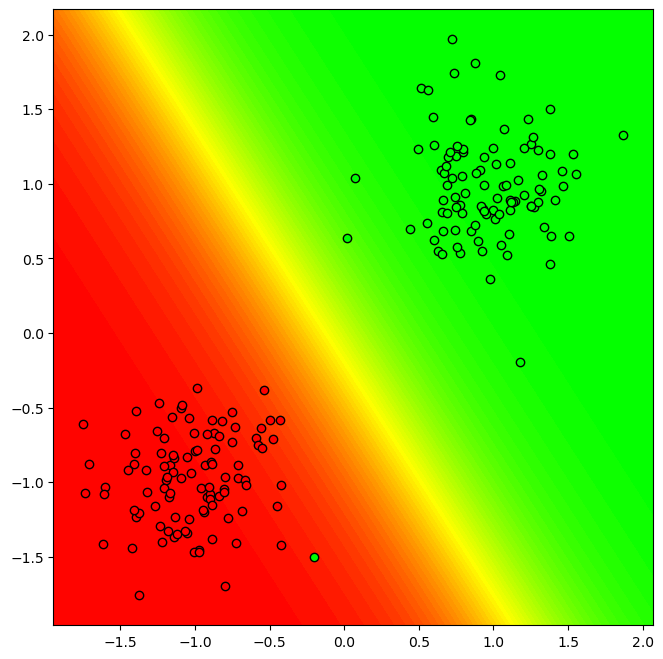

In [4]:
alpha = 1
logreg = linear_model.LogisticRegression(C=1/alpha)
logreg.fit(X, y)

a = logreg.intercept_[0]
b, c = logreg.coef_[0, :]
print(a, b, c)

fig, ax = plt.subplots(figsize=(8, 8))
plot_linreg(ax, X, y, a, b, c)
plt.show()

With almost no regularization we get perfect separation of both classes, but samples close to the red cloud might be missclassified as green (overfitting). Almost all inputs get classified close to 0 or close to 1. The region with mean predictions is very small.

7.8650652464787765 38.74250199983403 -2.765877255810703


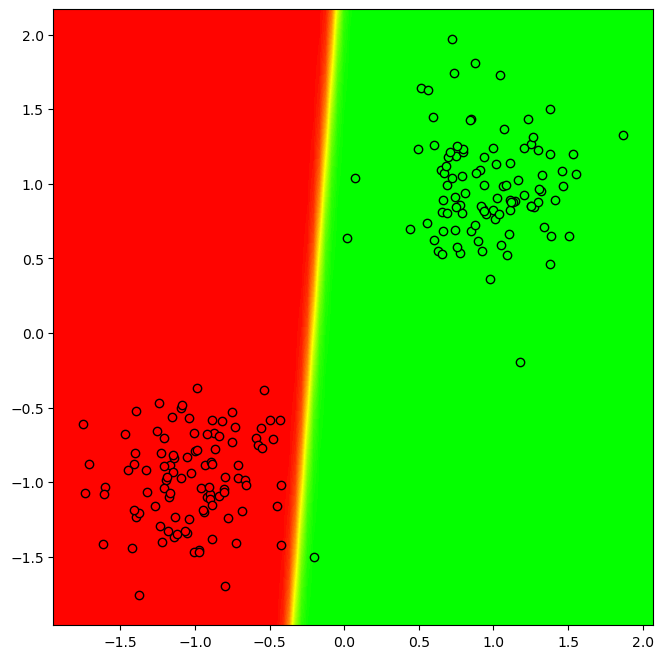

In [5]:
alpha = 1e-4
logreg = linear_model.LogisticRegression(C=1/alpha)
logreg.fit(X, y)

a = logreg.intercept_[0]
b, c = logreg.coef_[0, :]
print(a, b, c)

fig, ax = plt.subplots(figsize=(8, 8))
plot_linreg(ax, X, y, a, b, c)
plt.show()

If we further decrease regularization we run into numerical difficulties, because coefficients become arbitrarily large. The fact that for linearly separable classes the minimization problem has no solution can be restated as: the minimizer lies at infinity. Note that Scikit-Learn stops minimization if a maximum number of iterations is reached or decrease of the objective function is below some tolerance level. Thus, to see the influence of too low regularization we have to adjust those parameters. Else minimization stops to early.

In [6]:
alpha = 1e-15
logreg = linear_model.LogisticRegression(C=1/alpha, tol=1e-7)
logreg.fit(X, y)

a = logreg.intercept_[0]
b, c = logreg.coef_[0, :]
print(a, b, c)

np.exp(-(a + b * -2.1 + c * 1))

33.381878479995414 149.96785067058389 -9.427364096624917


2.3449177053285104e+126

## Decision Boundaries for Multiclass Classification

Classification methods divide the feature space into a set of mutually disjoint subsets, one subset per class. The boundaries between those subsets are called decision boundaries. For binary logistic regression with threshold-based classification boundary the decision boundary between the two classes is a hyperplane.

In multiclass classification with classes $1,\ldots,C$ the class with the highest predicted probability is choses as predicted class. Applying softmax to scores does not change the ordering of the scores. Thus, the class with the highest score is chosen. In logistic regression scores are linear functions of the feature values. If we want to decide whether class 1 is chosen as prediction for a given feature vector $x$ we have to compare corresponding score to scores of all other classes. The prediction for $x$ is class 1 if and only if
\begin{equation*}
\mathring{a}_1^\mathrm{T}\,\mathring{x}\geq\mathring{a}_2^\mathrm{T}\,\mathring{x},\quad\ldots,\quad\mathring{a}_1^\mathrm{T}\,\mathring{x}\geq\mathring{a}_C^\mathrm{T}\,\mathring{x},
\end{equation*}
where $\mathring{a}_C$ contains zeros (see above).
Equivalently,
\begin{equation*}
\left(\mathring{a}_1-\mathring{a}_2\right)^\mathrm{T}\,\mathring{x}\geq 0,\quad\ldots,\quad\left(\mathring{a}_1-\mathring{a}_C\right)^\mathrm{T}\,\mathring{x}\geq 0.
\end{equation*}
The set of feature vectors $x$ satisfying all these inequalities is the intersection of $C-1$ halfspaces (also known as $C$-dimensional polytope).

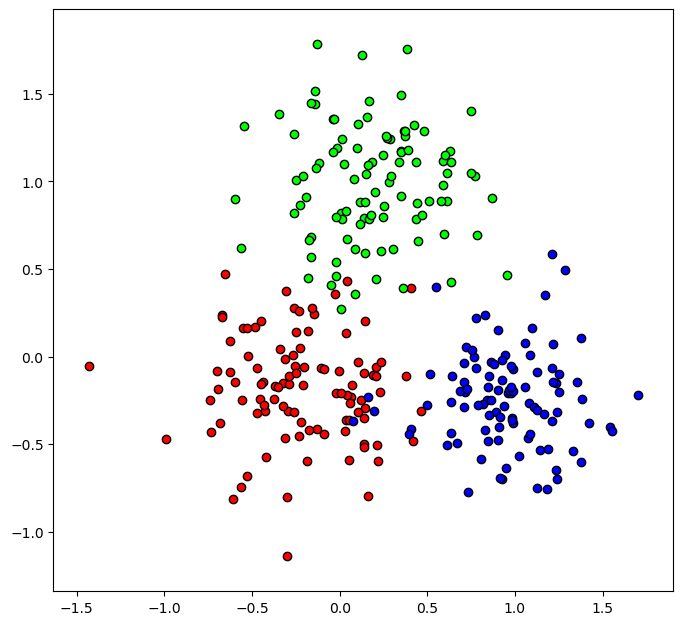

In [7]:
n1 = 100    # samples in class 0
n2 = 100    # samples in class 1
n3 = 100    # samples in class 2

# generate three point clouds
X1 = rng.multivariate_normal([-0.2, -0.2], [[0.1, 0], [0, 0.1]], size=n1)
X2 = rng.multivariate_normal([0.2, 1], [[0.1, 0], [0, 0.1]], size=n2)
X3 = rng.multivariate_normal([1, -0.2], [[0.1, 0], [0, 0.1]], size=n3)
X = np.concatenate((X1, X2, X3))

# set labels
y1 = 1 * np.ones(n1)
y2 = 2 * np.ones(n2)
y3 = 3 * np.ones(n3)
y = np.concatenate((y1, y2, y3))

# set plotting region
x0_min = X[:, 0].min() - 0.2
x0_max = X[:, 0].max() + 0.2
x1_min = X[:, 1].min() - 0.2
x1_max = X[:, 1].max() + 0.2

# plot data set
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='#ff0000', edgecolor='black')
ax.scatter(X[y == 2, 0], X[y == 2, 1], c='#00ff00', edgecolor='black')
ax.scatter(X[y == 3, 0], X[y == 3, 1], c='#0000ff', edgecolor='black')
ax.set_xlim(x0_min, x0_max)
ax.set_ylim(x1_min, x1_max)
ax.set_aspect('equal')
plt.show()

In [8]:
def plot_hyperplane(ax, a, b, c, color, style='-'):
    
    ax.plot([x0_min, x0_max], [-a/c - b/c * x0_min, -a/c - b/c * x0_max], style, color=color)

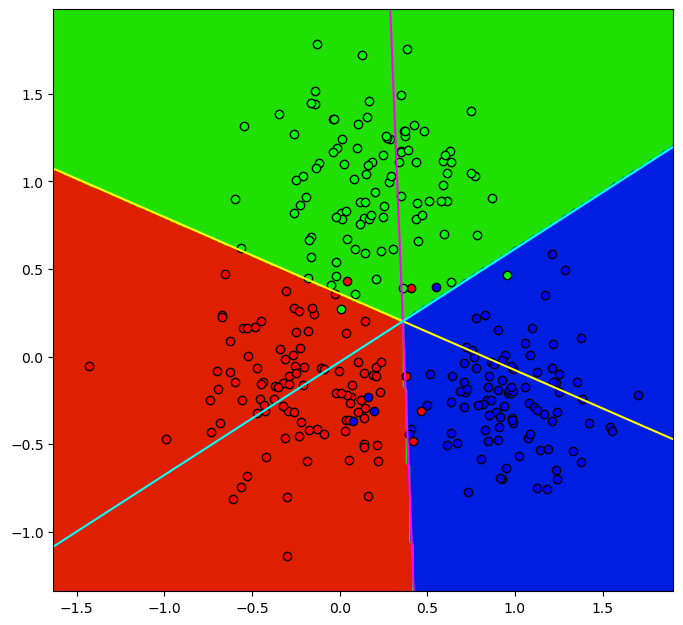

In [9]:
alpha = 1
logreg = linear_model.LogisticRegression(C=1/alpha)
logreg.fit(X, y)

fig, ax = plt.subplots(figsize=(8, 8))

# regions
x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, 200), np.linspace(x1_min, x1_max, 200))
y_grid = logreg.predict(np.stack((x0.reshape(-1), x1.reshape(-1)), axis=1)).reshape(x0.shape)
cm = matplotlib.colors.LinearSegmentedColormap.from_list('rgb', ['#ff0000', '#00ff00', '#0000ff'])
ax.contourf(x0, x1, y_grid, cmap=cm)

# data set
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='#ff0000', edgecolor='black')
ax.scatter(X[y == 2, 0], X[y == 2, 1], c='#00ff00', edgecolor='black')
ax.scatter(X[y == 3, 0], X[y == 3, 1], c='#0000ff', edgecolor='black')

a1, a2, a3 = logreg.intercept_
b1, b2, b3 = logreg.coef_[:, 0]
c1, c2, c3 = logreg.coef_[:, 1]

# decision boundaries (halfspaces)
plot_hyperplane(ax, a1 - a2, b1 - b2, c1 - c2, '#ffff00')
plot_hyperplane(ax, a1 - a3, b1 - b3, c1 - c3, '#ff00ff')
plot_hyperplane(ax, a2 - a3, b2 - b3, c2 - c3, '#00ffff')

# per class decision boundary (threshold = 0.5)
#plot_hyperplane(ax, a1, b1, c1, '#ff0000', '--')
#plot_hyperplane(ax, a2, b2, c2, '#00ff00', '--')
#plot_hyperplane(ax, a3, b3, c3, '#0000ff', '--')

ax.set_xlim(x0_min, x0_max)
ax.set_ylim(x1_min, x1_max)
ax.set_aspect('equal')

plt.show()